# Bose-Hubbard model in 1d
https://quspin.github.io/QuSpin/examples/user-basis_example2.html#user-basis-example2-label

In [36]:
#
import sys, os

os.environ["KMP_DUPLICATE_LIB_OK"] = (
    "True"  # uncomment this line if omp error occurs on OSX for python 3
)
os.environ["OMP_NUM_THREADS"] = "1"  # set number of OpenMP threads to run in parallel
os.environ["MKL_NUM_THREADS"] = "1"  # set number of MKL threads to run in parallel
#

#
from quspin.operators import hamiltonian  # Hamiltonians and operators
from quspin.basis import boson_basis_1d  # Hilbert space spin basis_1d
from quspin.basis.user import user_basis  # Hilbert space user basis
from quspin.basis.user import (
    next_state_sig_32,
    op_sig_32,
    map_sig_32,
    count_particles_sig_32,
)  # user basis data types signatures
from numba import carray, cfunc  # numba helper functions
from numba import uint32, int32, float64  # numba data types
import numpy as np
from scipy.special import comb

import matplotlib.pyplot as plt # matplotlib

In [39]:
def mathematica_export(name,array):
    f = open(name+".wl", "w")
    f.write(str(array).replace('[', '{').replace(']', '}'))
    f.close()

In [27]:
def energy(N,Np,U):
    # N : lattice sites
    # Np: total number of bosons
    sps = 4  # states per site
    #
    ############   create same boson basis_1d object   #############
    basis_1d = boson_basis_1d(N, Nb=Np, sps=sps, kblock=0, pblock=1)
    #
    ############   create Hamiltonians   #############
    #
    J = -1.0
    # U = +1.0
    #
    hopping = [[+J, j, (j + 1) % N] for j in range(N)]
    int_bb = [[0.5 * U, j, j] for j in range(N)]
    int_b = [[-0.5 * U, j] for j in range(N)]
    #
    static = [["+-", hopping], ["-+", hopping], ["nn", int_bb], ["n", int_b]]
    dynamic = []
    #
    no_checks = dict(check_symm=False, check_pcon=False, check_herm=False)
    H_1d = hamiltonian(static, [], basis=basis_1d, dtype=np.float64, **no_checks)

    Emin, Emax = H_1d.eigsh(k=2, which="BE", maxiter=1e4, return_eigenvectors=False)

    return Emin

def gap1(N,U):
    return energy(N,N+1,U) + energy(N,N-1,U) - 2*energy(N,N,U)

In [28]:
def gap2(N,U): 
    #
    # N : lattice sites
    sps = 4  # states per site
    Np = N  # total number of bosons
    #
    ############   create same boson basis_1d object   #############
    basis_1d = boson_basis_1d(N, Nb=Np, sps=sps, kblock=0, pblock=1)
    #
    ############   create Hamiltonians   #############
    #
    J = -1.0
    # U = +1.0
    #
    hopping = [[+J, j, (j + 1) % N] for j in range(N)]
    int_bb = [[0.5 * U, j, j] for j in range(N)]
    int_b = [[-0.5 * U, j] for j in range(N)]
    #
    static = [["+-", hopping], ["-+", hopping], ["nn", int_bb], ["n", int_b]]
    dynamic = []
    #
    no_checks = dict(check_symm=False, check_pcon=False, check_herm=False)
    H_1d = hamiltonian(static, [], basis=basis_1d, dtype=np.float64, **no_checks)

    eigvalsh = H_1d.eigvalsh()

    return eigvalsh[1]-eigvalsh[0]

In [49]:
gaps1 = [ [ [ l , u , float(gap1(l,u)) ] for u in [ 1. , 1.5 , 2. , 2.5 , 3. , 3.5 , 4. , 4.5 , 5 ] ] for l in range(4,12,1) ]

mathematica_export("gaps1",gaps1)

In [50]:
gaps2 = [ [ [ l , u , float(gap2(l,u)) ] for u in [ 1. , 1.5 , 2. , 2.5 , 3. , 3.5 , 4. , 4.5 , 5 ] ] for l in range(4,12,1) ]

mathematica_export("gaps2",gaps2)

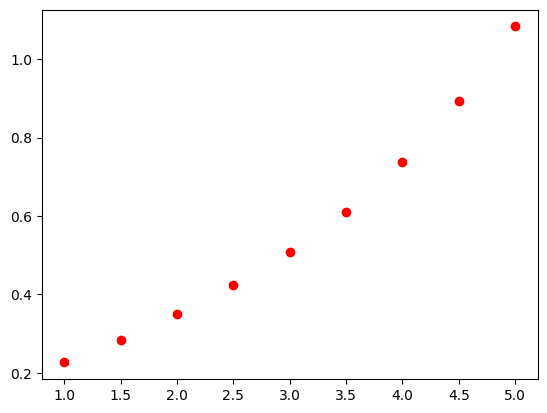

In [37]:
plt.plot(gaps1[:,0],gaps1[:,1], 'ro')
plt.show()

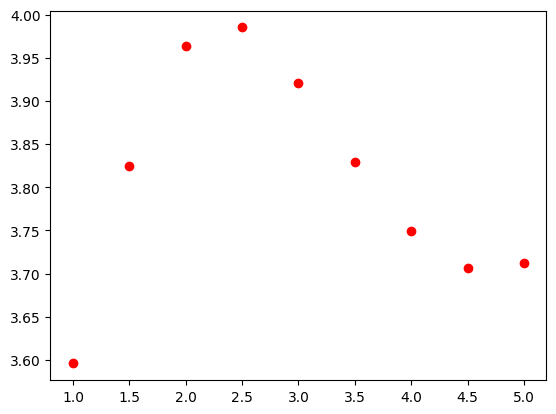

In [38]:
plt.plot(gaps2[:,0],gaps2[:,1], 'ro')
plt.show()